In [2]:
%load_ext autoreload
%autoreload 2

import cv2
import os
import createDigitImage

# Create a directory to store the images if it doesn't exist
output_dir = "digits_test_set"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


# Generate a test set of 100 images with random digits
num_images = 10

i = 0
for font_file in createDigitImage.font_files:
    font_name = os.path.splitext(os.path.basename(font_file))[0]
    i += 1
    (digit_image, digit) = createDigitImage.create_random_digit_image(font_file[2:])
    cv2.imwrite(os.path.join(output_dir, f"font_{font_name}.png"), digit_image*255)

for i in range(num_images):
    (digit_image, digit) = createDigitImage.create_random_digit_image_CV2()
    cv2.imwrite(os.path.join(output_dir, f"digit_{i}_{digit}.png"), digit_image*255)

print(f"Test set of {num_images} digits generated in the '{output_dir}' directory.")

Test set of 10 digits generated in the 'digits_test_set' directory.


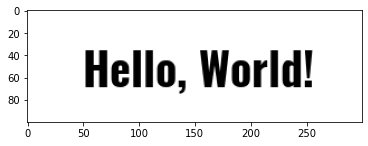

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
from PIL import Image, ImageDraw, ImageFont
import cv2

# Create a PIL image
img_pil = Image.new('RGB', (300, 100), color=(255, 255, 255))

# Set up drawing context
draw = ImageDraw.Draw(img_pil)

# Load a custom font (change to your font path)
font = ImageFont.truetype("Fonts/Oswald/Oswald-Bold.ttf", 40)

# Draw text on the PIL image
text = "Hello, World!"
draw.text((50, 25), text, font=font, fill=(0, 0, 0))

# Convert PIL image to NumPy array (OpenCV format)
img_cv = np.array(img_pil)

# Convert RGB to BGR (OpenCV uses BGR format)
img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)

# Display the image using OpenCV
#cv2.imshow("Image", img_cv)
#img_pil.show()
pyplot.imshow(img_cv)
